<a href="https://colab.research.google.com/github/pedrohortencio/applied-data-science-with-python/blob/main/Introduction%20to%20Data%20Science%20in%20Python/Week%2B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [ ]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [ ]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

In [ ]:
df['Delivered'] = True
df

In [ ]:
#pandas demands that the list to populate a df has to be the size of the df
#none or NaN values should be added to meet this criteria
df['Feedback'] = ['Positive', None, 'Negative']
df

In [ ]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

In [ ]:
#outer join = union (Venn's diagram)
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

In [ ]:
#inner join = intersection (Venn's diagram)
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

In [ ]:
#left join = only left with intersection (Venn's diagram)
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

In [ ]:
#right join = only right with intersection (Venn's diagram)
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

In [ ]:
#possible to join columns
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

# Idiomatic Pandas: Making Code Pandorable

In [ ]:
#importa a biblioteca do drive para poder fazer upload de files do meu drive
from google.colab import drive
#monta o drive na pasta drive
drive.mount('/content/drive')

In [ ]:
#só para checar se deu certo
!ls

drive  sample_data


In [ ]:
#comando para desmontar o drive
#drive.flush_and_unmount()

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/data/census.csv')
df

In [ ]:
##apagando colunas onde o valor de Quantity é zero
##renomeando uma coluna

#(df.drop(df[df['Quantity'] == 0].index)
#        .rename(columns={'Weight': 'Weight (oz.)'}))

In [ ]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

In [ ]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

In [ ]:
%%timeit -n 10
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

10 loops, best of 3: 182 ns per loop


In [ ]:
df.apply(min_max, axis=1)

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

In [ ]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

# Group by

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/My Drive/data/census.csv')
df = df[df['SUMLEV']==50]
df

In [ ]:
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

In [ ]:
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

In [ ]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,22,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,91,434,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,19,-1,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,14,-16,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,57711,57776,57734,57658,57673,51,338,65,-42,-76,15,183,744,710,646,618,603,133,570,592,585,589,590,50,174,118,61,29,13,5,...,-22,-14,53,489,489,489,489,489,489,489,12.929686,12.295756,11.185179,10.711314,10.456859,9.905808,10.252236,10.128993,10.208680,10.231421,3.023878,2.043520,1.056186,0.502634,0.225438,0.052136,0.329041,0.346290,0.485302,0.485559,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [ ]:
df = df.set_index('STNAME')
#group segmentation
#split-apply-combine method
def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/census.csv')
df = df[df['SUMLEV']==50]

In [ ]:
#agg -> recebe coluna e função e aplica a função
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

In [ ]:
#Looking at our backpacking equipment DataFrame, 
#suppose we are interested in finding our total weight for each category. 
#Use groupby to group the dataframe, 
#and apply a function to calculate the total weight (Weight x Quantity) by category.

df.groupby('Category').apply(lambda df,a,b: 
                             sum(df[a] * df[b]), 
                             'Weight (oz.)', 'Quantity')

In [ ]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

# Scales

In [ ]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [ ]:
#category = categoric data = nominal data = binary
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [ ]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

TypeError: ignored

In [ ]:
grades > 'C'

NameError: ignored

In [ ]:
#Try casting this series to categorical with the ordering Low < Medium < High.
s = pd.Series(['Low', 'Low', 'High', 'Medium', 'Low', 'High', 'Low'])

s.astype('category', categories=['Low', 'Medium', 'High'], ordered=True)


In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})

#the cut function "cuts" the numerical value in a number of categories. The categories may have labels
#pd.cut(series/df, bin, labels=[list of labels])
pd.cut(df['avg'],10)

# Pivot Tables

A pivot table is a way os summarizing data in a data frame. It's itself a dataframe; the rows represent one variable, the columns another and the cell's some aggregate value. It tends to include marginal vaues as well (the sums for each column and row).

This allows to see the relationship between two variables.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
#the dataset is the efficiency of different electric cars
df = pd.read_csv('/content/drive/My Drive/data/cars.csv')

In [ ]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [ ]:
#unique values of the YEAR column
df.YEAR.unique()

array([2012, 2013, 2014, 2015, 2016])

In [ ]:
pd.pivot_table(df, index=['Make', 'Size'])

In [ ]:
#compare the makes of electric cars versus the years in terms of battery capacity
#specify the aggregation function as the numpy mean
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [ ]:
df.shape

In [ ]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                         ...   amin                 
Make    BMW CHEVROLET   FORD   KIA  ... NISSAN SMART  TESLA All
YEAR                                ...                        
2012    NaN       NaN    NaN   NaN  ...   80.0   NaN    NaN  49
2013    NaN       NaN  107.0   NaN  ...   80.0  35.0  270.0  35
2014    NaN     104.0  107.0   NaN  ...   80.0  35.0  225.0  35
2015  125.0     104.0  107.0  81.0  ...   80.0  35.0  280.0  35
2016  125.0     104.0  107.0  81.0  ...   80.0  35.0  283.0  35
All   125.0     104.0  107.0  81.0  ...   80.0  35.0  225.0  35

[6 rows x 18 columns]

# Date Functionality in Pandas

In [ ]:
import pandas as pd
import numpy as np

### Timestamp

In [ ]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [ ]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [ ]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [ ]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [ ]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [ ]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [ ]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [ ]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,16,46
"Aug 29, 2014",14,66
2015-06-26,59,99
7/12/16,27,17


In [ ]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,16,46
2014-08-29,14,66
2015-06-26,59,99
2016-07-12,27,17


In [ ]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [ ]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [ ]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [ ]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [ ]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,107,123
2016-10-16,113,116
2016-10-30,109,127
2016-11-13,107,118
2016-11-27,112,129
2016-12-11,113,118
2016-12-25,119,119
2017-01-08,121,123
2017-01-22,121,125


In [ ]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [ ]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,5.0,-3.0
2016-10-30,2.0,5.0
2016-11-13,6.0,-1.0
2016-11-27,-3.0,0.0
2016-12-11,-5.0,-5.0
2016-12-25,-4.0,5.0
2017-01-08,0.0,-1.0
2017-01-22,-4.0,-2.0


In [ ]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,108.0,124.666667
2016-11-30,115.5,126.000000
2016-12-31,107.0,123.500000
2017-01-31,103.0,124.000000


In [ ]:
df['2017']

,Count 1,Count 2
2017-01-08,105,125
2017-01-22,101,123


In [ ]:
df['2016-12']

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126


In [ ]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126
2017-01-08,105,125
2017-01-22,101,123


In [ ]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,107,123
2016-10-09,107,123
2016-10-16,113,116
2016-10-23,113,116
2016-10-30,109,127
2016-11-06,109,127
2016-11-13,107,118
2016-11-20,107,118
2016-11-27,112,129
2016-12-04,112,129


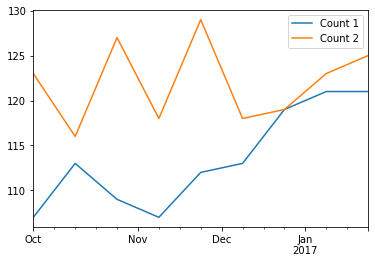

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()